# Исследование закономернойстей успеха компьютерных игр

В нашем распоряжении данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
У нас имеются данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. В проекте мы отработаем принцип работы с данными.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Работа будет разделена на несколько основных шагов.

### Отображение датасета.

### Предобработка данных
    
- Изменение названия столбцов и приведение их к нижнему регистру.
    
- Преобразование данных в нужные типы.
    
- Обработка пропусков.
    
- Подсчёт суммарных продаж во всех регионах.

### Исследовательский анализ данных

- Исследование: сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

- Исследование: как менялись продажи по платформам. Распределение платформ по наибольшему количеству продаж за известные годы.  За какой характерный срок появляются новые и исчезают старые платформы?

- Исследование данных по актуальному периоду.

- Исследование лидеров по продажам. Разбор нескольких потенциально прибыльных платформ.

- «Ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результатов.

- Исследование влияния отзывы пользователей и критиков на продажи. Диаграмма рассеяния и подсчет корреляции между отзывами и продажами. Выводы.

- Общие выводы.

### Портрет пользователя каждого региона

- Портрет пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Различия в долях продаж.

- Самые популярные жанры (топ-5). Разница.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Пояснения.

### Общий вывод

## Отображение датасета.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

Импорт необходимых библиотек.

In [4]:
data = pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\games.csv')
data.info()
display(data.head());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
print(data.duplicated().sum())
data[~data.duplicated(keep=False)]

0


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Отображение датасета.

## Предобработка данных

### Приведение к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower() #приведение датасета к нижнему регистру.
data.info()
display(data.head());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
NaNs = np.where(pd.isnull(data))#поиск координат (строк и столбцов) NaN
NaNs = np.array(NaNs).tolist()#преобразования массивов в списки координат
nans_columns = NaNs[1]#выборка столбцов
nans_columns = list(set(nans_columns))#преобразование множеств в список
#print(nans_columns)
data_column_name = data.columns.values#находим названия столбцов в дф
print(data_column_name[nans_columns])#смотрим названия столбцов с NaNsами

['name' 'year_of_release' 'genre' 'critic_score' 'user_score' 'rating']


### Преобразование данных в нужные типы и работа над пропусками.

In [8]:
#Функция для просмотра пропусков
def pass_value(data):
    (
        (data.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = 0, legend = False, fontsize = 16, color = 'Pink')
        .set_title('NaNsы' + "\n", fontsize = 22)    
    );  

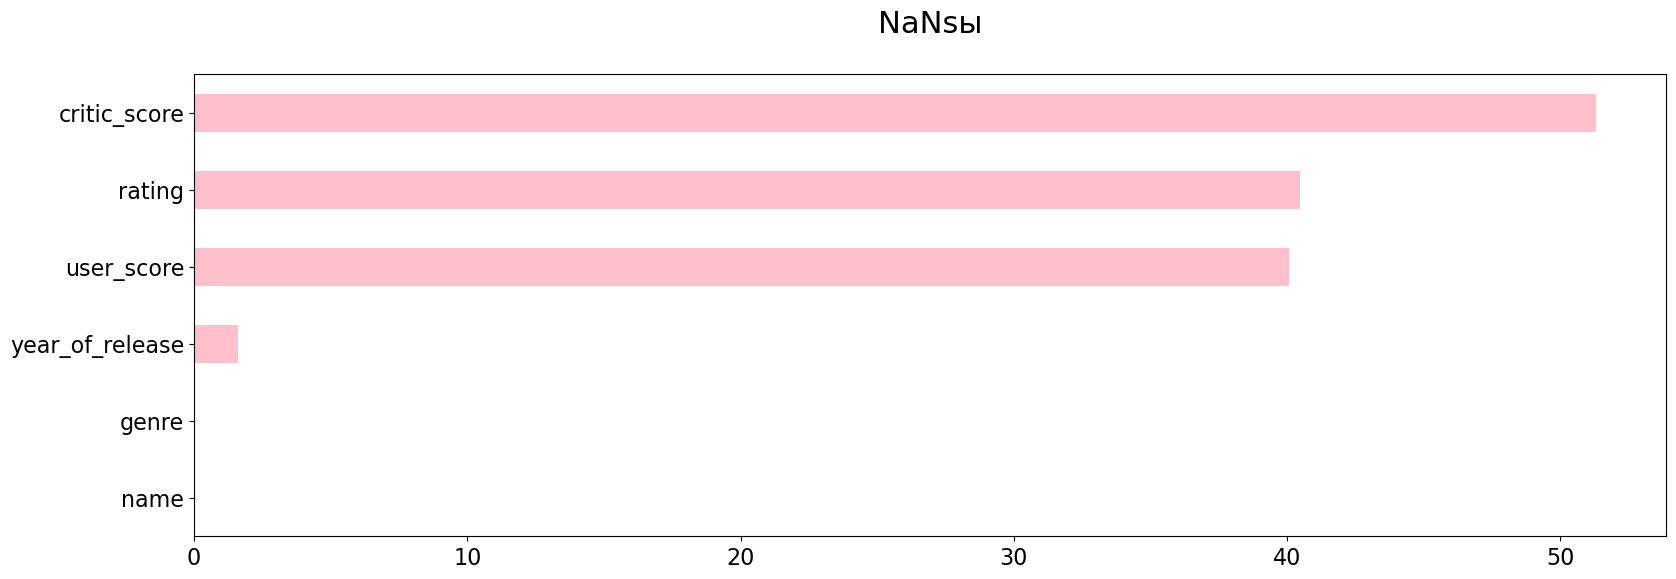

In [9]:
pass_value(data) #визуальное отображение количества пустых ячеек в столбцах.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


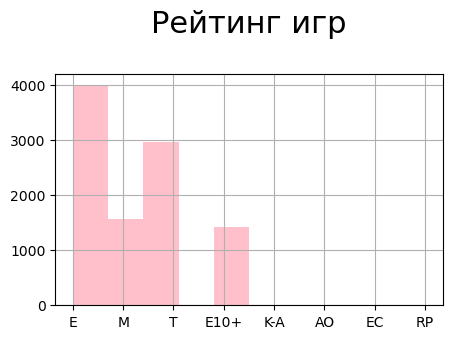

In [10]:
data.info()
dh = data['rating'].hist(figsize=(5, 3), color = 'Pink');
dh.set_title('Рейтинг игр' + "\n", fontsize = 22);

In [11]:
data['critic_score'] = data['critic_score'].fillna(-1)

Наблюдение за поведением некоторых показателей рейтинга в ходе работы над поректом показали, что замена пустых ячеек на те или иные показатели или их удаление не приведет к качесственной работе над исследованием.

In [12]:
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [13]:
data[data['year_of_release']==0] = np.nan #замена 0ей на nan
print(data['year_of_release'].unique())
data.info()

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


При сохранении 0-ей в столбце даты у нас может нарушиться распределение в графиках.

In [14]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN) #замена tbd на nan
print(data['user_score'].unique())
data.info()

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' '8.8' '6.9' '9.4'
 '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7' '4.1'
 '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3' '4.7'
 '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8' '1.8'
 '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2' '2.3'
 '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   e

"Tbd" - ("To be determined" - "Будет определено"). Оценка пользователей еще не проставлена в связи с тем, что игра еще не реализована в продаже. Решила проставить nan в связи с тем, что не хочу утрачивать необходимые данные. 

In [15]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')#преобрахование в нужный тип
data['user_score'] = data['user_score'].fillna(-1)#заполнение пропущенных значений на среднее по столбцу.
data['user_score'] = round(data['user_score'], 1)#округление до одного знака после запятой.
print(data['user_score'].unique())
data['rating'] = data['rating'].fillna('no_ESRB')#рейтинг определяется или не определн

[ 8.  -1.   8.3  8.5  6.6  8.4  8.6  7.7  6.3  7.4  8.2  9.   7.9  8.1
  8.7  7.1  3.4  5.3  4.8  3.2  8.9  6.4  7.8  7.5  2.6  7.2  9.2  7.
  7.3  4.3  7.6  5.7  5.   9.1  6.5  8.8  6.9  9.4  6.8  6.1  6.7  5.4
  4.   4.9  4.5  9.3  6.2  4.2  6.   3.7  4.1  5.8  5.6  5.5  4.4  4.6
  5.9  3.9  3.1  2.9  5.2  3.3  4.7  5.1  3.5  2.5  1.9  3.   2.7  2.2
  2.   9.5  2.1  3.6  2.8  1.8  3.8  0.   1.6  9.6  2.4  1.7  1.1  0.3
  1.5  0.7  1.2  2.3  0.5  1.3  0.2  0.6  1.4  0.9  1.   9.7]


In [16]:
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_ESRB
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_ESRB


### Добавление столбца с сумарными продажами

In [17]:
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_ESRB,31.38


## Исследовательский анализ данных

### Игры в разные годы

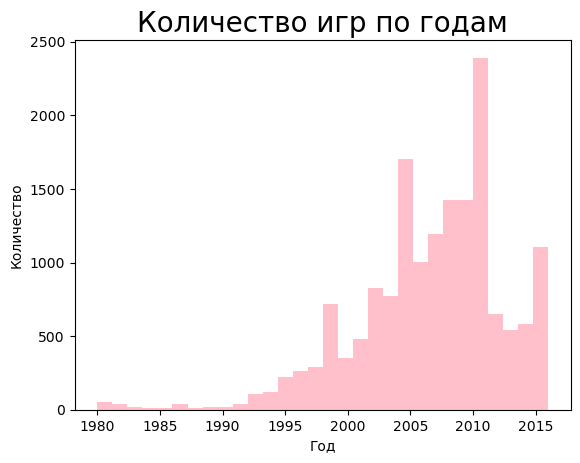

In [19]:
yr = data['year_of_release'].plot(kind='hist', bins=30, color = 'Pink')
yr.set_title('Количество игр по годам', fontsize = 20);
yr.set_xlabel('Год');
yr.set_ylabel('Количество');

По визуализации можно заметить, что в период с 2005 по 2010 были большие скачки по количеству релизов. Затем спад, а в 2015 снова рост количества релизов - где-то процентов на 40-45 (визуально). Выполняют 5-летки?

### Продажи по платформам

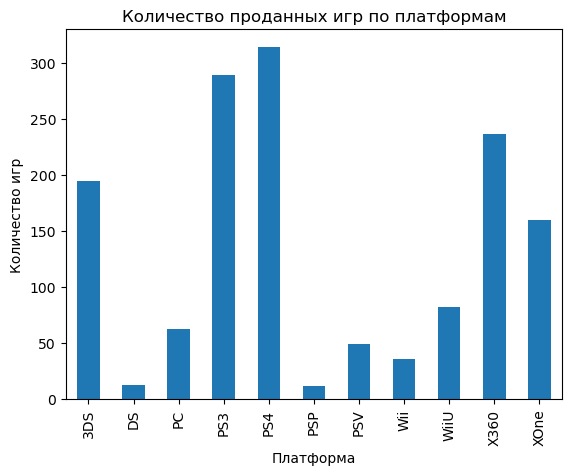

In [58]:
plrm_sum = data.groupby('platform')['sum_sales'].sum()
#print(plrm_sum);
plrm_sum.plot(kind='bar',title = 'Количество проданных игр по платформам', xlabel = 'Платформа', ylabel = 'Количество игр');

Самые популярные платформы: 'PS2','DS','PS3','X360','PS','Wii'. Возьму их для дальнейшего исследования.

In [21]:
main_plrm = ['PS2','DS','PS3','X360','PS','Wii']
pop_plrm = data[data['platform'].isin(main_plrm)]
#display(pop_plrm.head(10))

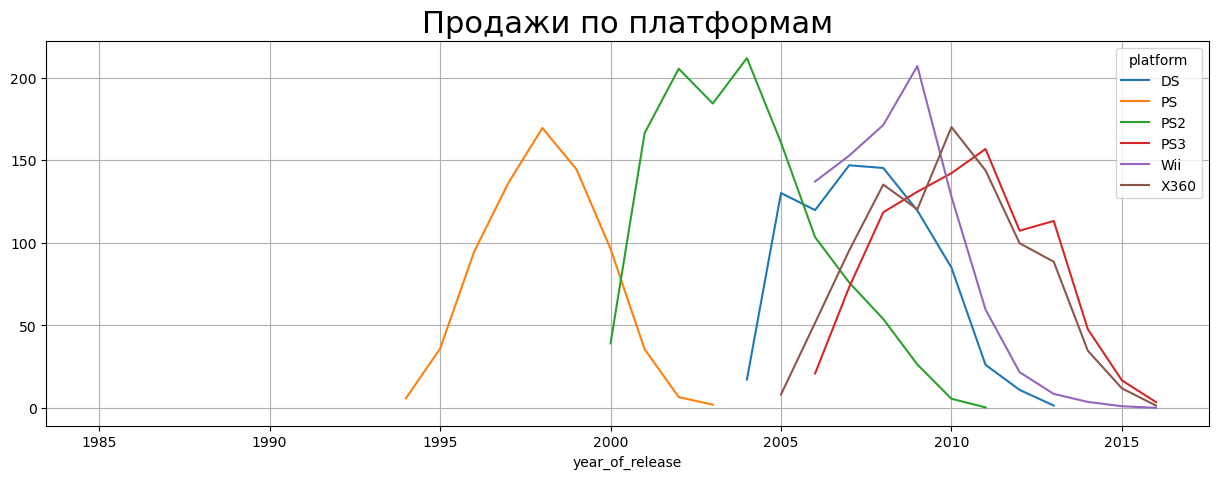

In [22]:
pt_df = pop_plrm.pivot_table(index='year_of_release', columns ='platform', values = 'sum_sales', aggfunc='sum')
plt = pt_df.plot(grid=True, figsize=(15, 5));
plt.set_title('Продажи по платформам', fontsize = 22);

Мы видим ситуацию похожую, как с играми. Появление новых платформ тяготеет к 5-леткам. Но неизменно снижение популярности происходит каждые 10 лет. В последнее 10-летие (2005 - 2015) их было выпущенно (среди популярных) в 2 раза больше, чем до 2005.

### Актуальный период

In [23]:
data = data[data['year_of_release'] >= 2012]

Поскольку мы видим тенденцию производительности игровой индустрии каждые 5 лет, я взяла информацию с 2010 по 2016 год. Считаю этот период наиболее актуальным.

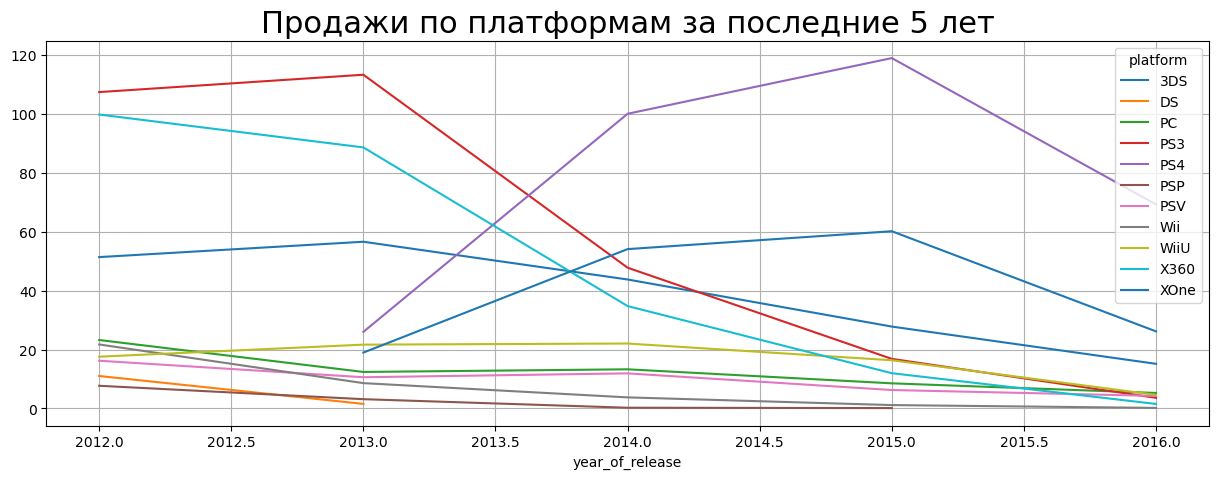

In [24]:
pt_data = data.pivot_table(index='year_of_release', columns ='platform', values = 'sum_sales', aggfunc='sum')
plt = pt_data.plot(grid=True, figsize=(15, 5));
plt.set_title('Продажи по платформам за последние 5 лет', fontsize = 22);

Популярность большинства платформ падает ежегодно. Роста не наблюдается ни по одной из платформ. Однако, понаблюдав за PC, можно сделать вывод, что компьютеры - наиболее стабильная платформа для реализации игр (да и что говоррить, неизменно все эксклюзивные игр для платформ потом переходят на PC), но при этом она не "хайпует". А другие появляются и исчезают внезапно. Лидеры по продажам за актуальныц период: '3DS', 'DS','PS3', 'PS4', 'XOne', 'PS', 'Wii'.

### Потенциально прибыльные платформы

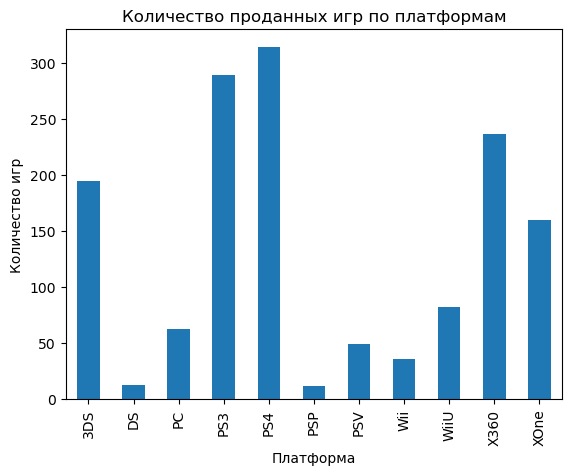

In [60]:
pt_data = data.pivot_table(index='year_of_release', columns ='platform', values = 'sum_sales', aggfunc='sum')
plrm_sum = data.groupby('platform')['sum_sales'].sum()
plrm_sum.plot(kind='bar', title = 'Количество проданных игр по платформам', xlabel = 'Платформа', ylabel = 'Количество игр');

Возьмем самые популярные платформы для анализа. Не будем брать PS3, т.к. это предыдущая версия PS4. Можно их объединить в одну категорию платформ.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_ESRB,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no_ESRB,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,no_ESRB,11.68
62,New Super Mario Bros. 2,3DS,2012.0,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


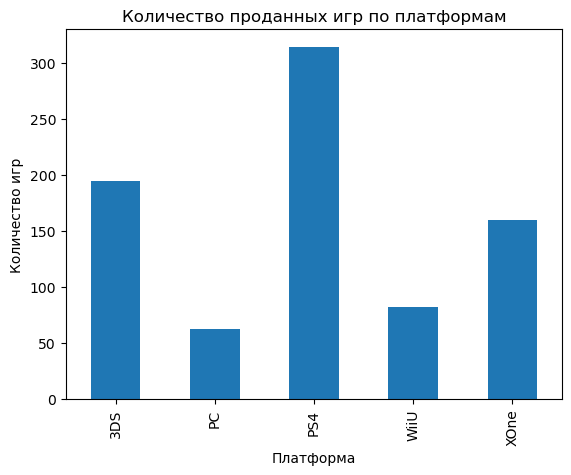

In [61]:
main_plrm_new = ['3DS','PS4','WiiU','XOne','PC']
prm_data = data[data['platform'].isin(main_plrm_new)]
display(prm_data.head())
prm_data.groupby('platform')['sum_sales'].sum().plot(kind='bar', title = 'Количество проданных игр по платформам', xlabel = 'Платформа', ylabel = 'Количество игр');

### Ящик с усами

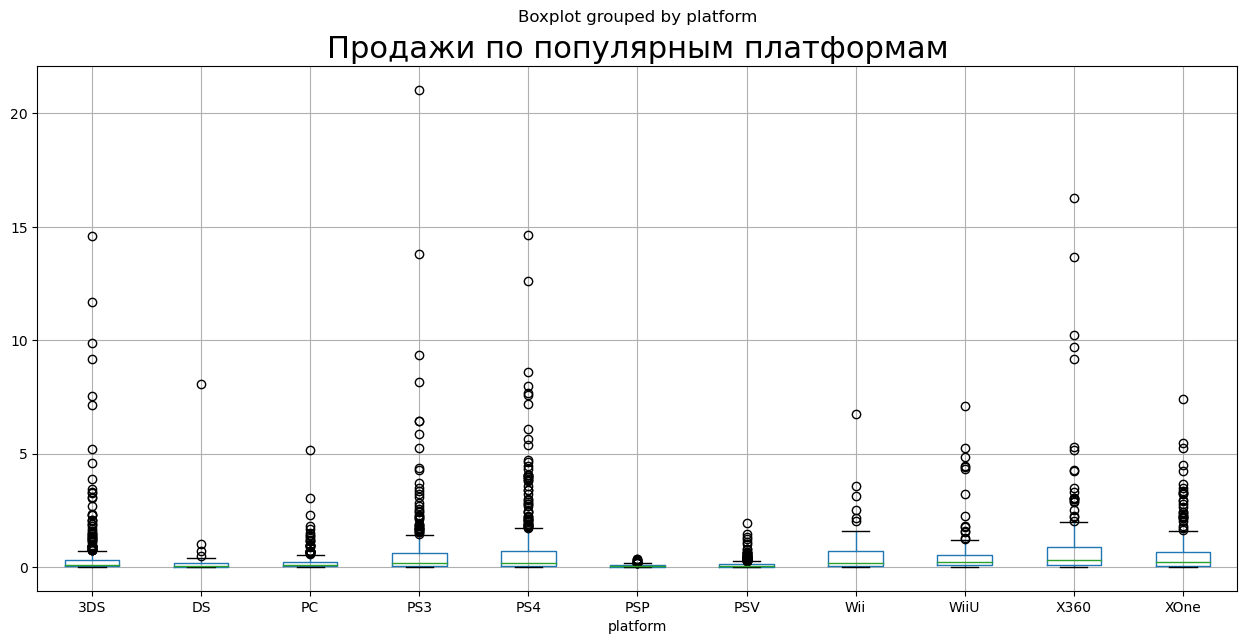

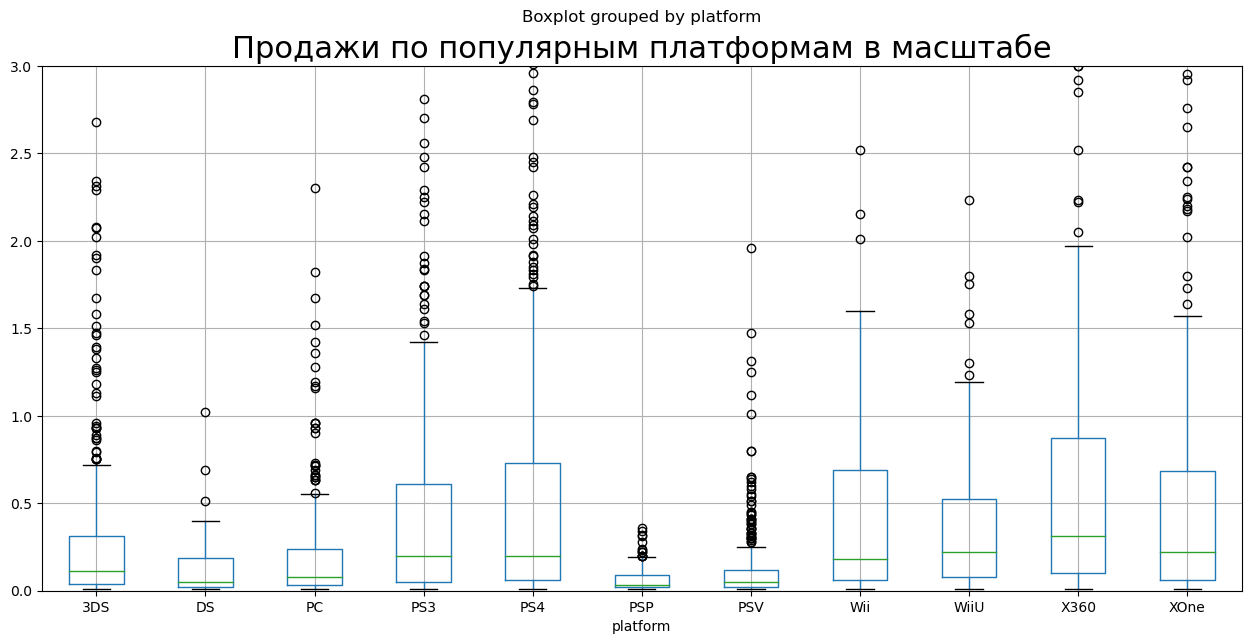

In [27]:
df_box = data.boxplot(column='sum_sales', by='platform', figsize=(15,7))
bow_df = data.boxplot(column='sum_sales', by='platform', figsize=(15,7));
bow_df.set_ylim(0, 3)
bow_df.set_title('Продажи по популярным платформам в масштабе', fontsize = 22);
df_box.set_title('Продажи по популярным платформам', fontsize = 22);
#display(prm_data.head(30))

У нас есть выбросы, которые могут незначительно влиять на медиану. Их я не стану отбрасывать в основном датафрейме, но для масштабирования уменьшу значения.

### Корреляция между отзывами и продажами

#### Оценка критиков

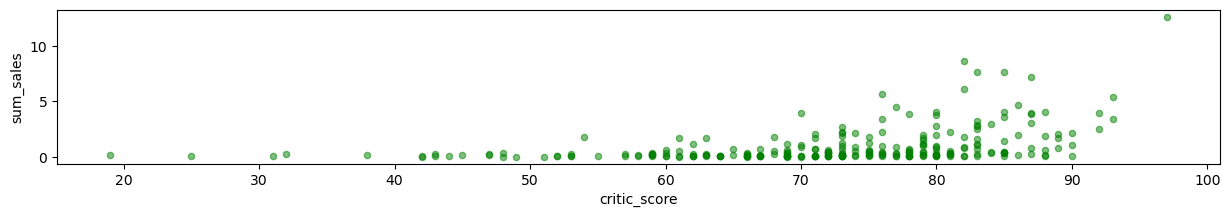

In [28]:
ps4 = data[(data['platform'] == 'PS4')&(data['critic_score'] >= 0)]
ps4_plt = ps4.plot(kind='scatter',
         y='sum_sales', x='critic_score' , alpha=0.5, subplots=True, figsize=(15,2), c = 'g')

Можно сделать выводы, что чаще всего критики ставят оценку от 6 до 8.5 баллов. Мы видим выбросы по продажам там, где оценка выше 6.5, а также наблюдаем, что количество продаж после 6-ого значения увеличивается.

#### Оценка пользователей

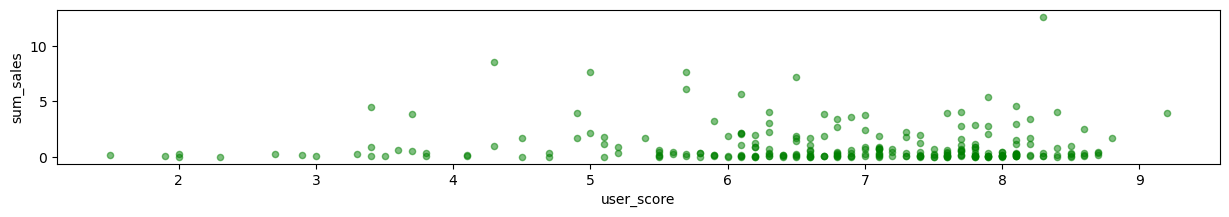

In [29]:
ps4 = data[(data['platform'] == 'PS4')&(data['user_score'] >= 0)]
ps4_plt = ps4.plot(kind='scatter',
         y='sum_sales', x='user_score' , alpha=0.5, subplots=True, figsize=(15,2), c = 'g')

In [30]:
for column in ['user_score', 'critic_score']:
    print('Коэффициент корреляции: {} '.format(round(ps4[column].corr(ps4['sum_sales']), 3)))

Коэффициент корреляции: -0.032 
Коэффициент корреляции: 0.35 


Здесь более положительные оценки и рассеяние более разрозненное. 

#### PC. Оценка

In [31]:
# Комментарий ревьюера 3
print(len(data[(data['platform'] == 'PC')&(data['user_score'] >= 0)]))
print(len(data[(data['platform'] == 'PC')&(data['critic_score'] >= 0)]))
print(len(data[(data['platform'] == 'PC')&(data['user_score'] >= 0)&(data['critic_score'] >= 0)]))

206
198
197


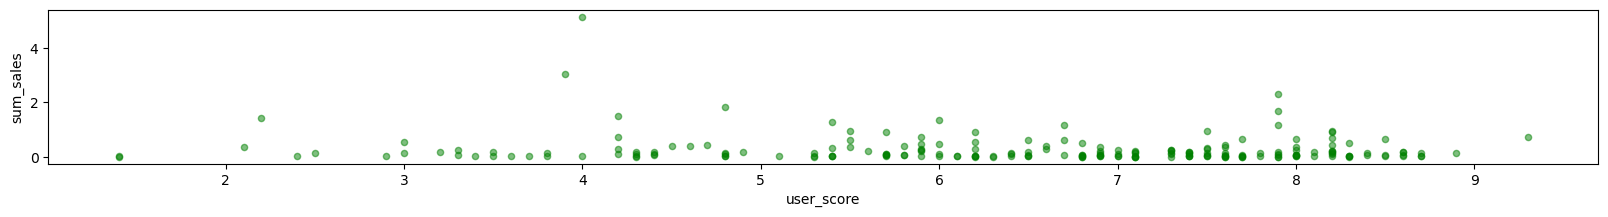

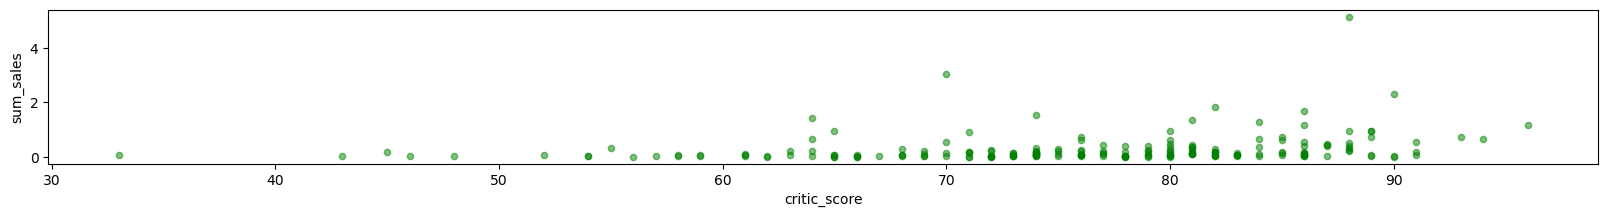

In [32]:
PC = data[(data['platform'] == 'PC')&(data['user_score'] >= 0)]
PC_plt = PC.plot(kind='scatter',
         y='sum_sales', x='user_score', alpha=0.5, subplots=True, figsize=(20,2), c = 'g')
PC1 = data[(data['platform'] == 'PC')&(data['critic_score'] >= 0)]
PC_plt = PC1.plot(kind='scatter',
         y='sum_sales', x='critic_score', alpha=0.5, subplots=True, figsize=(20,2), c = 'g')

In [33]:
for column in ['user_score', 'critic_score']:
    print('Коэффициент корреляции: {} '.format(round(PC[column].corr(PC['sum_sales']), 3)))

Коэффициент корреляции: -0.122 
Коэффициент корреляции: 0.2 


Оценка критиков и пользователей на этой платформе распределена более равномерно. Пользователи не стесняются ставить оценки меньше 4.

#### XOne. Оценка

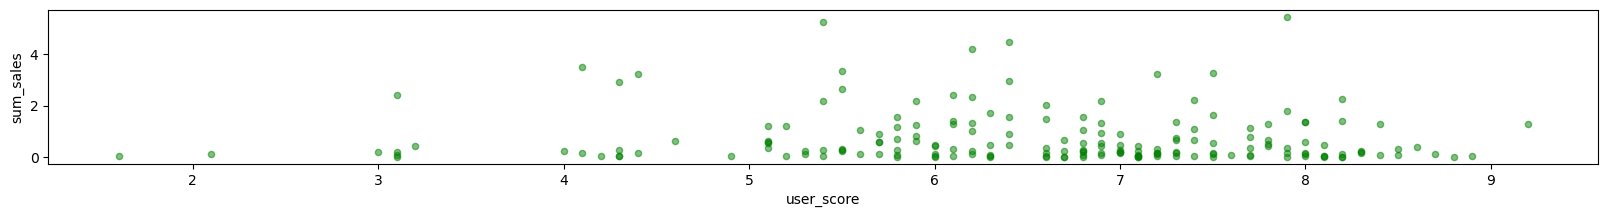

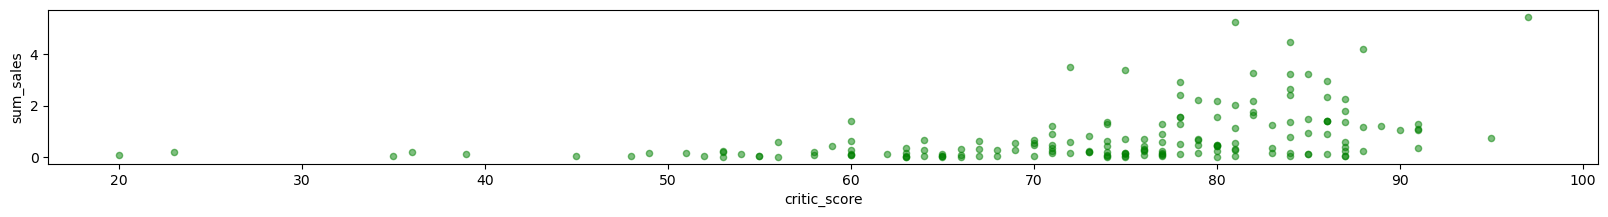

In [35]:
XOne = data[(data['platform'] == 'XOne')&(data['user_score'] >= 0)]
XOne_plt = XOne.plot(kind='scatter',
         y='sum_sales', x='user_score' , alpha=0.5, subplots=True, figsize=(20,2), c = 'g')
XOne1 = data[(data['platform'] == 'XOne')&(data['critic_score'] >= 0)]
XOne_plt1 = XOne1.plot(kind='scatter',
         y='sum_sales', x='critic_score' , alpha=0.5, subplots=True, figsize=(20,2), c = 'g')

In [36]:
for column in ['user_score', 'critic_score']:
    print('Коэффициент корреляции: {} '.format(round(XOne[column].corr(XOne['sum_sales']), 3)))

Коэффициент корреляции: -0.069 
Коэффициент корреляции: 0.334 


Здесь мы наблюдаем ситуацию похожую на ситуацию с первой платформой.

#### 3DS. Оценка 

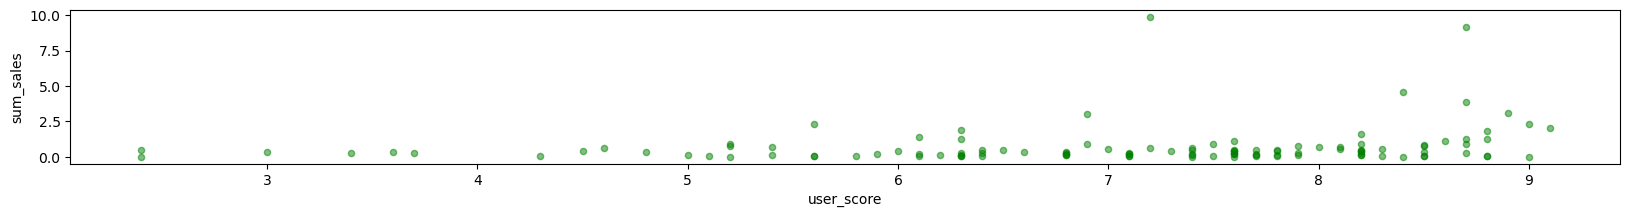

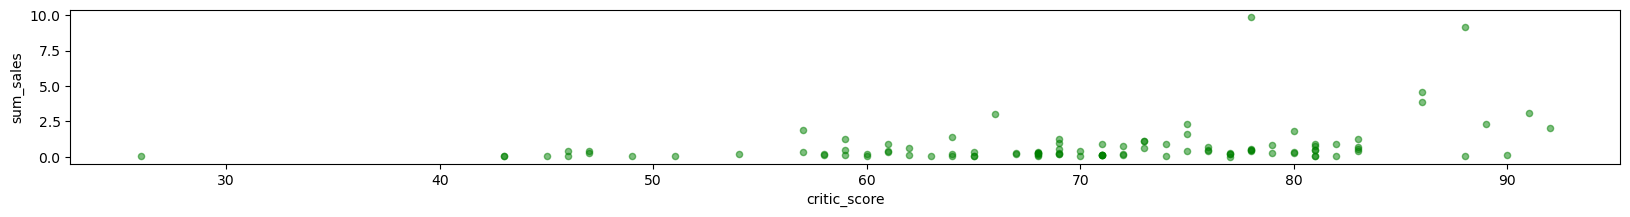

In [37]:
_3DS = data[(data['platform'] == '3DS')&(data['user_score'] >= 0)]
_3DS_plt = _3DS.plot(kind='scatter',
         y='sum_sales', x='user_score' , alpha=0.5, subplots=True, figsize=(20, 2), c = 'g')
_3DS1 = data[(data['platform'] == '3DS')&(data['critic_score'] >= 0)]
_3DS_plt1 = _3DS1.plot(kind='scatter',
         y='sum_sales', x='critic_score' , alpha=0.5, subplots=True, figsize=(20, 2), c = 'g')

In [38]:
for column in ['user_score', 'critic_score']:
    print('Коэффициент корреляции: {} '.format(round(_3DS[column].corr(_3DS['sum_sales']), 3)))

Коэффициент корреляции: 0.198 
Коэффициент корреляции: 0.25 


На этой платформе ни критики, ни пользователи не стесняются ставить оценки меньше 6.

#### WiiU. Оценка

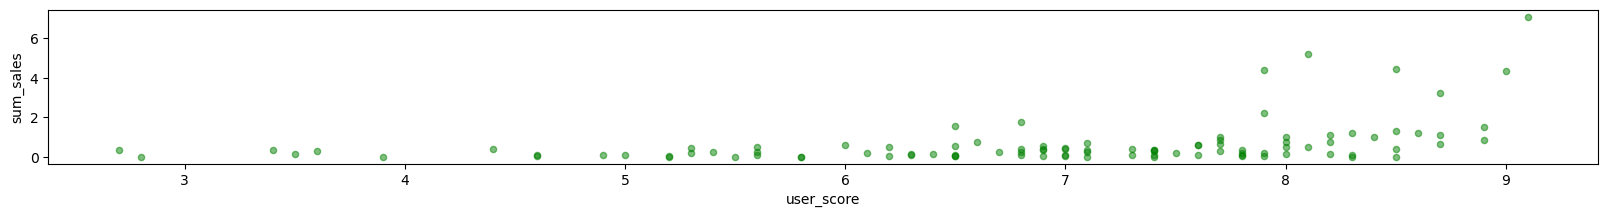

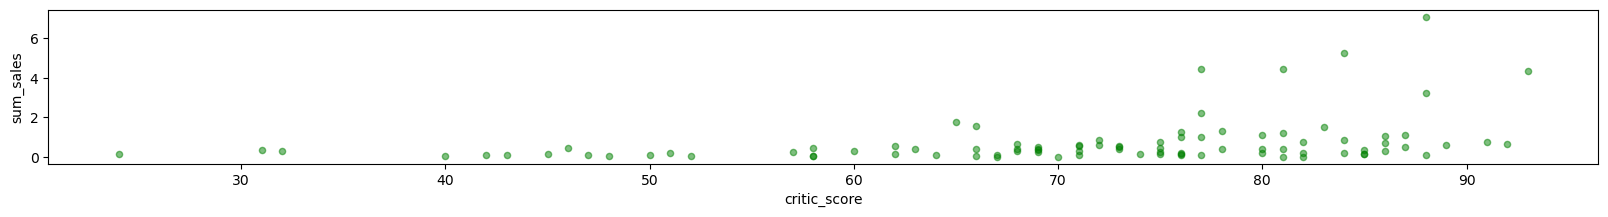

In [39]:
WiiU = data[(data['platform'] == 'WiiU')&(data['user_score'] >= 0)]
WiiU_plt = WiiU.plot(kind='scatter',
         y='sum_sales', x='user_score' , alpha=0.5, subplots=True, figsize=(20, 2), c = 'g')
WiiU1 = data[(data['platform'] == 'WiiU')&(data['critic_score'] >= 0)]
WiiU_plt1 = WiiU1.plot(kind='scatter',
         y='sum_sales', x='critic_score' , alpha=0.5, subplots=True, figsize=(20, 2), c = 'g')

In [40]:
for column in ['user_score', 'critic_score']:
    print('Коэффициент корреляции: {} '.format(round(WiiU[column].corr(WiiU['sum_sales']), 3)))

Коэффициент корреляции: 0.4 
Коэффициент корреляции: 0.329 


Похоже, исключительно игровые платформы отлчаются стабильными и похожими оценками. А вот на компьютерах пользователи в оценках более раскрепощенные.

### Распределение игр по жанрам

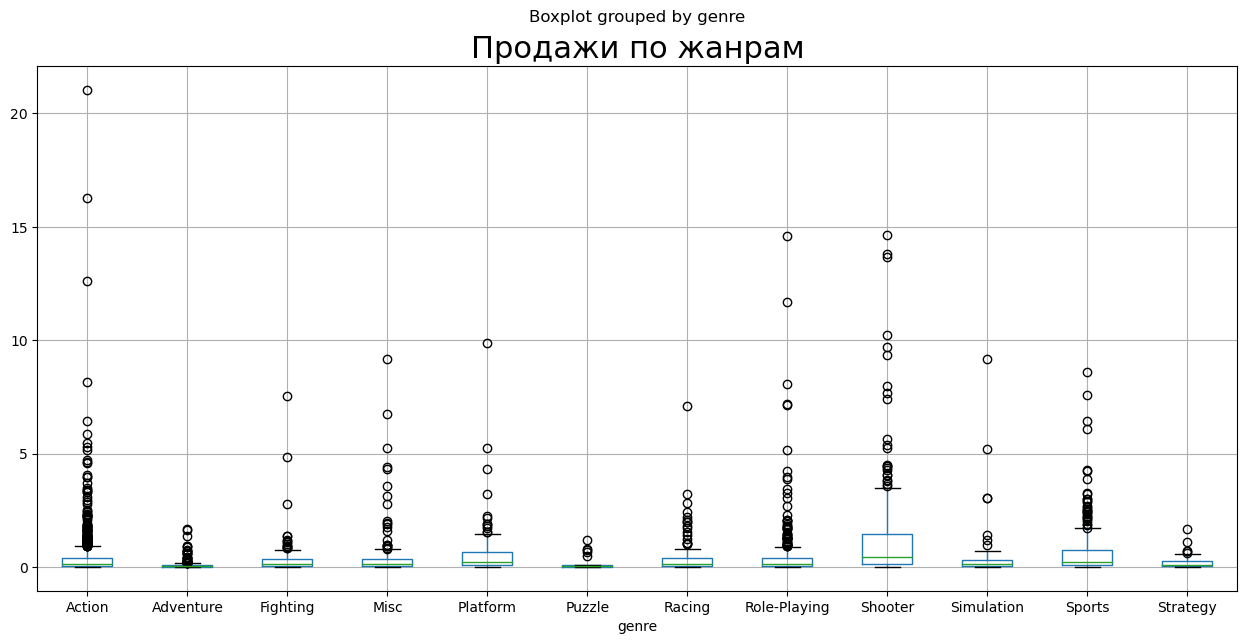

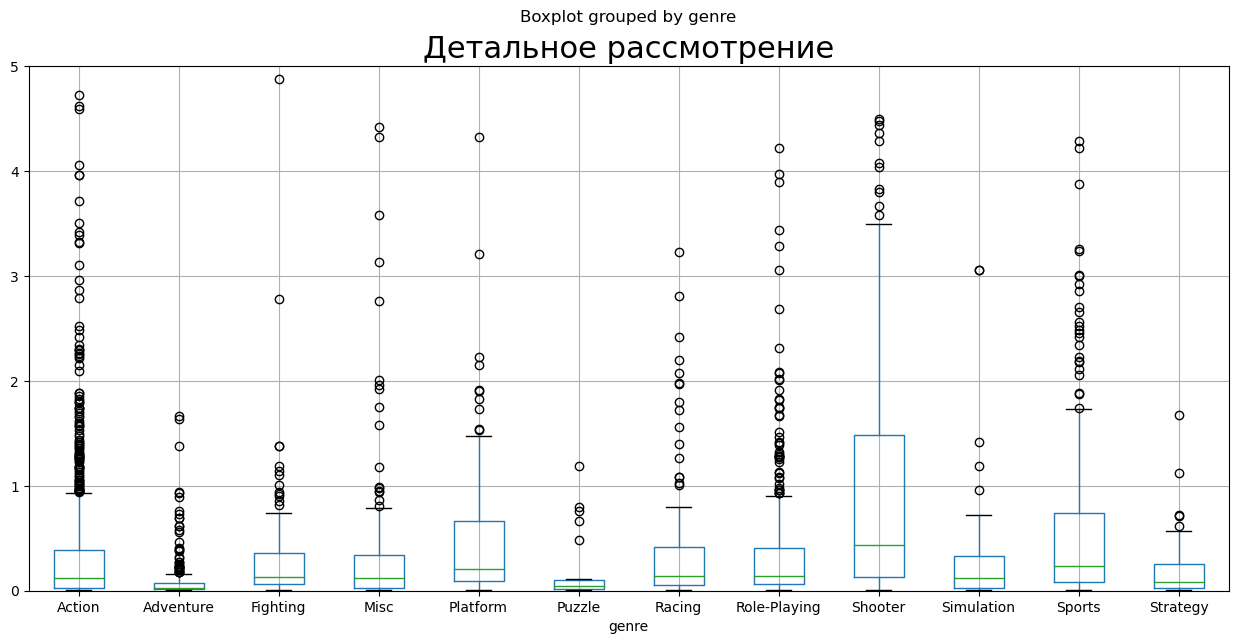

In [41]:
pt_df = data.boxplot(column='sum_sales', by='genre', figsize=(15,7));
pt_df1 = data.boxplot(column='sum_sales', by='genre', figsize=(15,7));
pt_df1.set_ylim(0, 5)
pt_df.set_title('Продажи по жанрам', fontsize = 22);
pt_df1.set_title('Детальное рассмотрение', fontsize = 22);

Наиболее популярные жанры: шутеры, симуляторы, гонки, платформеры, спорт и экшон. Медианные значения подсказывают нам, что наиболее популярный жанр - шутер.

## Портрет пользователя по регионам

In [42]:
na_genre = data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
eu_genre = data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
jp_genre = data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)

main_g = na_genre.merge(eu_genre, on='genre', how='left')
main_g = main_g.merge(jp_genre, on='genre', how='left')

display(main_g)

na_plrm = data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
eu_plrm = data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
jp_plrm = data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)

main_p = na_plrm.merge(eu_plrm, on='platform', how='left')
main_p = main_p.merge(jp_plrm, on='platform', how='left')

display(main_p)

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Shooter,144.77,113.47,9.23
Sports,81.53,69.09,8.01
Role-Playing,64.00,48.53,65.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Fighting,19.79,10.79,9.44
Racing,17.22,27.29,2.50
Adventure,8.92,9.46,8.24


,na_sales,eu_sales,jp_sales
platform,,,
X360,140.05,74.52,1.57
PS4,108.74,141.09,15.96
PS3,103.38,106.86,35.29
XOne,93.12,51.59,0.34
3DS,55.31,42.64,87.79
WiiU,38.10,25.13,13.01
PC,19.12,37.76,0.00
Wii,17.45,11.92,3.39
PSV,10.98,11.36,21.04


В Азии есть резкое отличие от Америки и Европы. Похоже, они не очень любят шутеры, но обожают ролевые игры. Большинство жанров игр, которые предпочитают азиаты подразумевают какой-то сюжет. В шутерах и спортивных играх такого сюжета либо нет, либо его не назовешь глубоким. Интересная разница менталитетов.

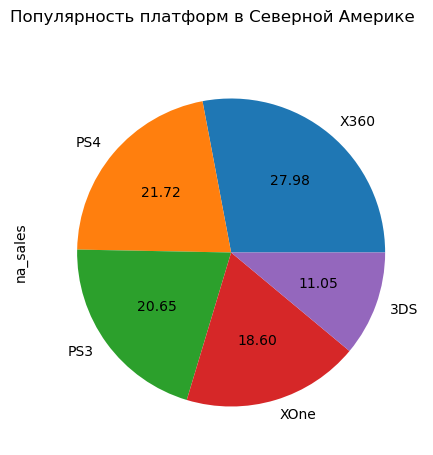

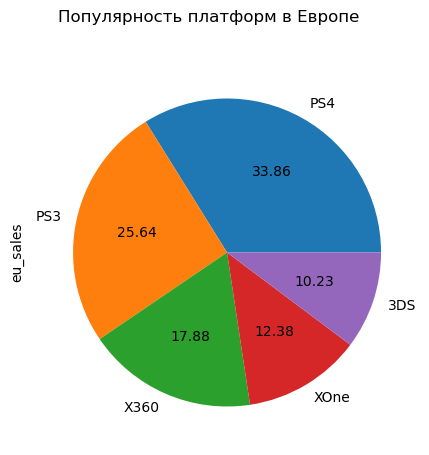

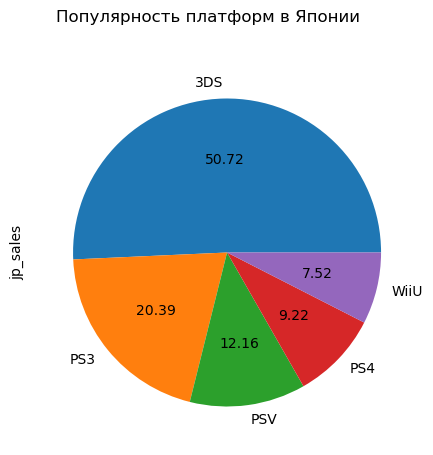

In [44]:
nap = na_plrm.head(5).plot(kind='pie', subplots=True, figsize=(15,5), 
                            autopct="%.2f", fontsize=10, legend = False, 
                            title = 'Популярность платформ в Северной Америке');
eup = eu_plrm.head(5).plot(kind='pie', subplots=True, figsize=(15,5), 
                            autopct="%.2f", fontsize=10, legend = False, 
                            title = 'Популярность платформ в Европе');
jpp = jp_plrm.head(5).plot(kind='pie', subplots=True, figsize=(15,5),
                            autopct="%.2f", fontsize=10, legend = False, 
                            title = 'Популярность платформ в Японии');

C:\Users\Leron\AppData\Local\Temp\ipykernel_8480\837239607.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
C:\Users\Leron\AppData\Local\Temp\ipykernel_8480\837239607.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
C:\Users\Leron\AppData\Local\Temp\ipykernel_8480\837239607.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, 

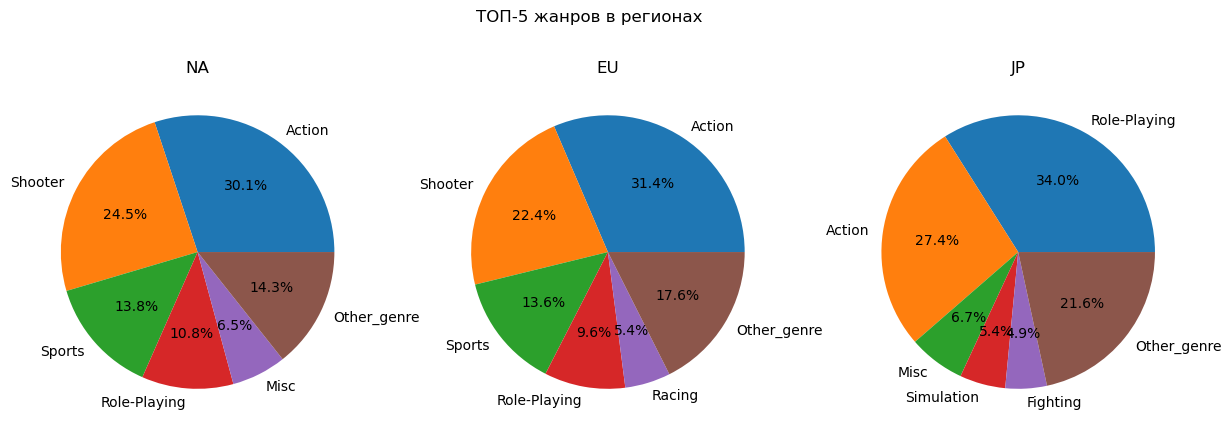

In [45]:
import matplotlib.pyplot as plt
games_fresh = data.copy()
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Японцы предпочитают свои платофрмы (и чаще всего портативные), а америкнцы свои. Причем, судя по всему японцы пользуются только своими наработками преимущественно. Америка не стесняется использовать японские платформы, но в лидерах у них X360.
Европа "миксует". Причем судя по всему Европа - основной пользователь еще и ПК.

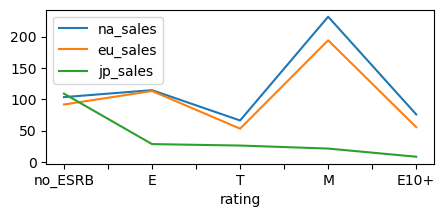

In [46]:
na_esrb = data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
eu_esrb = data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
jp_esrb = data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)

main = na_esrb.merge(eu_esrb, on='rating', how='right')
main = main.merge(jp_esrb, on='rating', how='right') 

main.plot(figsize=(5,2));

ESRB В Японии рейтинг ESRB почти ни на что не влияет, как подсказал ревьюер, следует искать корни в самой системе этого рейтинга. В Японии эту рейтинговую систему не используют.

In [47]:
# Комментарий ревьюера
temp = data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no_ESRB    1275
M           498
T           412
E           395
E10+        306
Name: rating, dtype: int64

## Проверка гипотез

H₀: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H₁: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [48]:
xbox = data[(data['platform'] == 'XOne')&(data['user_score'] >= 0)]
pc1 = data[(data['platform'] == 'PC')&(data['user_score'] >= 0)]
print('Cредний пользовательскиw рейтинг платформы Xbox One:', xbox['user_score'].mean())
print('Cредний пользовательскиw рейтинг платформы PC:', pc1['user_score'].mean())

Cредний пользовательскиw рейтинг платформы Xbox One: 6.52142857142857
Cредний пользовательскиw рейтинг платформы PC: 6.428640776699027


In [49]:
# Комментарий ревьюера 3
xbox.user_score.min(), pc1.user_score.min()

(1.6, 1.4)

In [50]:
alpha = .05 #критический уровень статистической значимости
xone = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
pc = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']

results = st.ttest_ind(xone, pc, equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


H₀: Средние пользовательские рейтинги жанров Action и Sports разные.

H₁: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [51]:
action = data[(data['genre'] == 'Action')&(data['user_score'] >= 0)]
sports = data[(data['genre'] == 'Sports')&(data['user_score'] >= 0)]
print('Cредний пользовательскиw рейтинг жанрa Action:', action['user_score'].mean())
print('Cредний пользовательскиw рейтинг жанрa Sports:', sports['user_score'].mean())

Cредний пользовательскиw рейтинг жанрa Action: 6.825047801147237
Cредний пользовательскиw рейтинг жанрa Sports: 5.455897435897437


In [52]:
alpha = 0.05
act = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']
spo = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']

results2 = st.ttest_ind(act, spo, equal_var = True)

print('p-значение:', results2.pvalue)

if (results2.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Не получилось отвергнуть нулевую гипотезу


Исходя из тестов можно сделать вывод, что обе 0-ые гипотезы верны.

## Общий вывод

Мы наблюдаем скачкообразное развитие индустрии видеоигр - каждые 5 лет выпускают новые игры, и каждые 10 лет появляется новая платформа.

Спад развития индустрии игр приходится на конец 2015-начало 2016 годов. Не уверена в полноте данных на 16 год, однако есть предположение, что в 2017 был новый скачок развития, если гипотеза о скачкообразном развитии верна. Поскольку многие релизы приходятся на осень, есть вероятность, что данные по 16ому году были предоставлены летом или весной 16.

Мы наблюдаем, что количество продаж имеет отношение к оценкам критиков и пользователей.
На большинстве платформ они схожи, но игровые платформы несколько отличаются в разбросе от ПК.

Японцы, в силу своего нестандартного мышления (отличного от европейцев и американцев) предпочитают игры, подразумевающие наличие сложных сюжетных поворотов. Европейцы в свою очередь схожи в предпочтениях с американцами.

Похоже, оценка ESRB не сильно влияет на предпочтения игроков из Японии, т.к. эта рейтинговая система там не используется. А вот американцы и европейцы разделились на два лагеря. Очень много игроков предпочитающие игры категории "для взрослых" - М, материалы таких игр не подходят для подростков младше 17 лет, и категории "для всех" - Е.

Было бы правильно не привязываться к рейтингу ESRB в Японии, а направить рекламу на продукты, выпускаемых на японских платформах, особенно на мобильной 3DS. Японцы намного чаще играют с них в связи с их образом жизни. 
Наиблее подходящяя для вложения рекламы платформа во всех регионах - PS3, но вложения во вторую платформу следует разделить: для Японии 3DS, для Европы и Америки - PS4 (для этих двух регионов рейтинг предпочтителен - М или Е).

В Японии лучше рекламировать их популярные жанры: рпг, экшон, медитативные симуляторы и файтинги.
У Европы и Америки схожи их жанровые предпочтения: спорт, шутеры, экшон. 

Отзывы пользователей имеют значения на этапе доработки готового продукта - обновления. Отзывы не изменишь и не скорректируешь сильно, можно только принять к сведению в последующих проектах. Отзывы критиков, в случае, если они были приглашены до выпуска продукта в качестве фокус-группы (чего мы не знаем наверняка), должны помочь в отработке деталей перед реализацией продукта. 